In [31]:
# Quantifying IAP type & phylogeny between different CTCF clusterings:

In [32]:
import pybedtools
import pandas as pd
import seaborn as sns

In [38]:
iap_type_bed = pybedtools.BedTool("data/feature_beds/mm10.IAP.mended.bed")
iap_dataset_bed = pybedtools.BedTool("data/clean_beds/mm10.IAP.mended.extent.bed")
structure_df = pd.read_csv("data/mm10.IAP.structures.tsv", sep='\t', header=0)

In [36]:
# Obtaining sequence files:
fasta = "data/GRCm38.p6.genome.fa"
filtered_dataset = iap_dataset_bed.filter(lambda x: len(x) < 2000)
filtered_dataset = filtered_dataset.sequence(fi=fasta)
filtered_dataset.save_seqs("data/iap_sequence.fa")

<BedTool(<generator object BedTool.filter.<locals>.<genexpr> at 0x126f40f50>)>

In [5]:
intersect_bed = iap_dataset_bed.intersect(iap_type_bed, wao=True, s=True, f=0.8).saveas()
names = ["chrom", "start", "end", "element_id",
         "length", "strand", "chrom1", "start1", "end1", "iap_type",
         "uh", "strand1", "overlap"]
intersect_df = intersect_bed.to_dataframe(names=names)
intersect_df.index = intersect_df["element_id"].astype(int).to_list()
intersect_df.index.value_counts()

2528578    1
2782692    1
245197     1
304590     1
3550671    1
          ..
2681624    1
3115804    1
4022696    1
3685096    1
571956     1
Length: 8059, dtype: int64

In [55]:
cluster_df = pd.read_pickle("data/iap_clustered.pkl")

In [56]:
structure_df.index = structure_df["element.ID"].astype(int).to_list()
structure_df

,element.ID,reduced.structure,basic.structure,top.names.x,optimal.structure
28,28,IAPLTR1a_Mm,LTR,IAPLTR1a_Mm,IAPLTR1a_Mm
182,182,IAPEY3_LTR|IAPEy-int|IAPEY2_LTR,LTR-internal-LTR,IAPEY2_LTR – IAPEy-int,IAPEY2_LTR – IAPEy-int
1272,1272,IAPLTR2b,LTR,IAPLTR2b,IAPLTR2b
1427,1427,IAPLTR1a_Mm,LTR,IAPLTR1a_Mm,IAPLTR1a_Mm
1976,1976,IAPEz-int|IAPEY4_I-int|IAPEz-int|IAPLTR2_Mm,internal-LTR,IAPLTR2_Mm – IAPEY4_I-int,IAPEz-int|IAPEY4_I-int|IAPEz-int|IAPLTR2_Mm
...,...,...,...,...,...
4646824,4646824,IAPLTR3-int,internal,IAPLTR3-int,IAPLTR3-int
4646828,4646828,IAP-d-int,internal,IAP-d-int,IAP-d-int
4646859,4646859,IAPLTR3-int|IAPLTR3,internal-LTR,IAPLTR3 – IAPLTR3-int,IAPLTR3-int|IAPLTR3
4646863,4646863,IAPEz-int|IAPLTR2b,internal-LTR,IAPLTR2b – IAPEz-int,IAPEz-int|IAPLTR2b


In [47]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]
label_order = ["A", "B", "C", "D", "E"]

In [78]:
cluster_df["iap_type"] = structure_df["top.names.x"]
cluster_df

,chrom,start,end,element_id,length,strand,val_result,cluster_assignments,iap_type
151177,chr1,95057294,95057326,151177,33,-,Untested,B,IAPLTR2b
25136,chr1,20055335,20055371,25136,37,-,Untested,B,IAPLTR2a2_Mm
159399,chr1,100567693,100567739,159399,47,+,Untested,A,IAPLTR2b
160006,chr1,100931364,100931413,160006,50,+,Untested,A,IAPEY2_LTR
91370,chr1,60586644,60586694,91370,51,-,Untested,B,IAPEY5_I-int
...,...,...,...,...,...,...,...,...,...
4180871,chr9,92734665,92742098,4180871,7434,-,Untested,C,IAPLTR2a – IAPEz-int
4041241,chr9,19763109,19770697,4041241,7589,-,Untested,A,IAPLTR2b – IAPEz-int
4069873,chr9,36157171,36165366,4069873,8196,+,Untested,A,IAPEY3_LTR – IAPEY3-int
4041384,chr9,19897067,19906574,4041384,9508,+,Untested,A,IAPEY_LTR – IAPEy-int


In [79]:
normalised_counts_dataframe = pd.DataFrame(columns=label_order)
for label in label_order:
    clus_assign = cluster_df.loc[cluster_df["cluster_assignments"] == label, :]
    number = clus_assign.shape[0]
    counts = clus_assign["iap_type"].value_counts().sort_index()
    normalised_counts = counts.apply(lambda x: x / number)
    normalised_counts_dataframe[label] = normalised_counts

[(0, 0.2)]

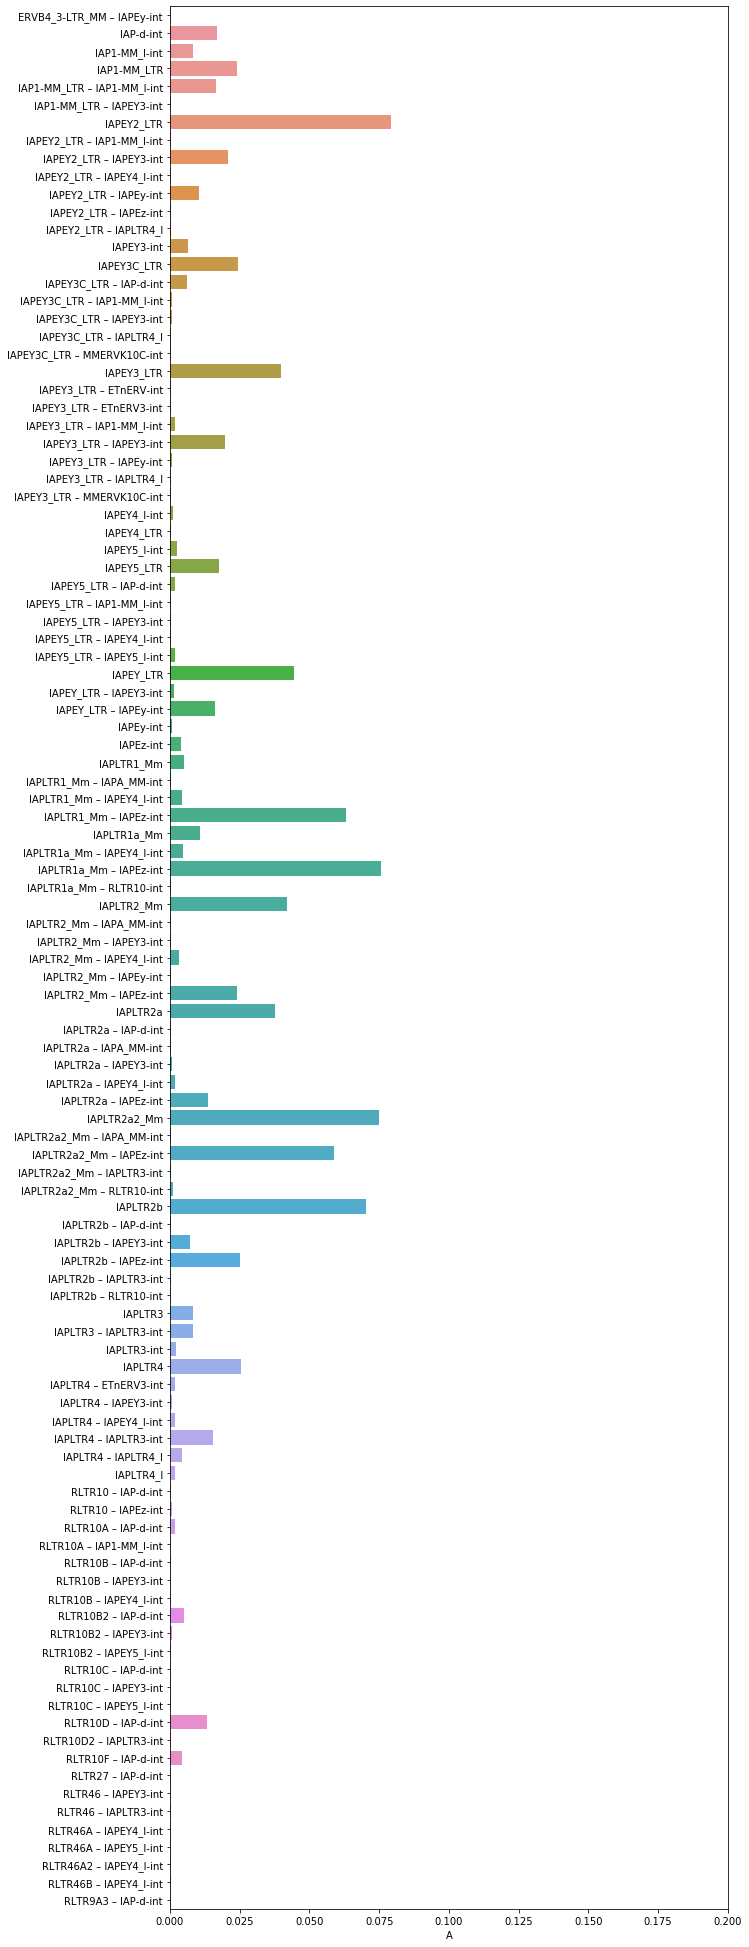

In [80]:
matplotlib.rcParams['figure.figsize'] = [10, 35]
ax = sns.barplot(y=normalised_counts_dataframe["A"].index, x=normalised_counts_dataframe["A"])
ax.set(xlim=(0, 0.2))

[(0, 0.2)]

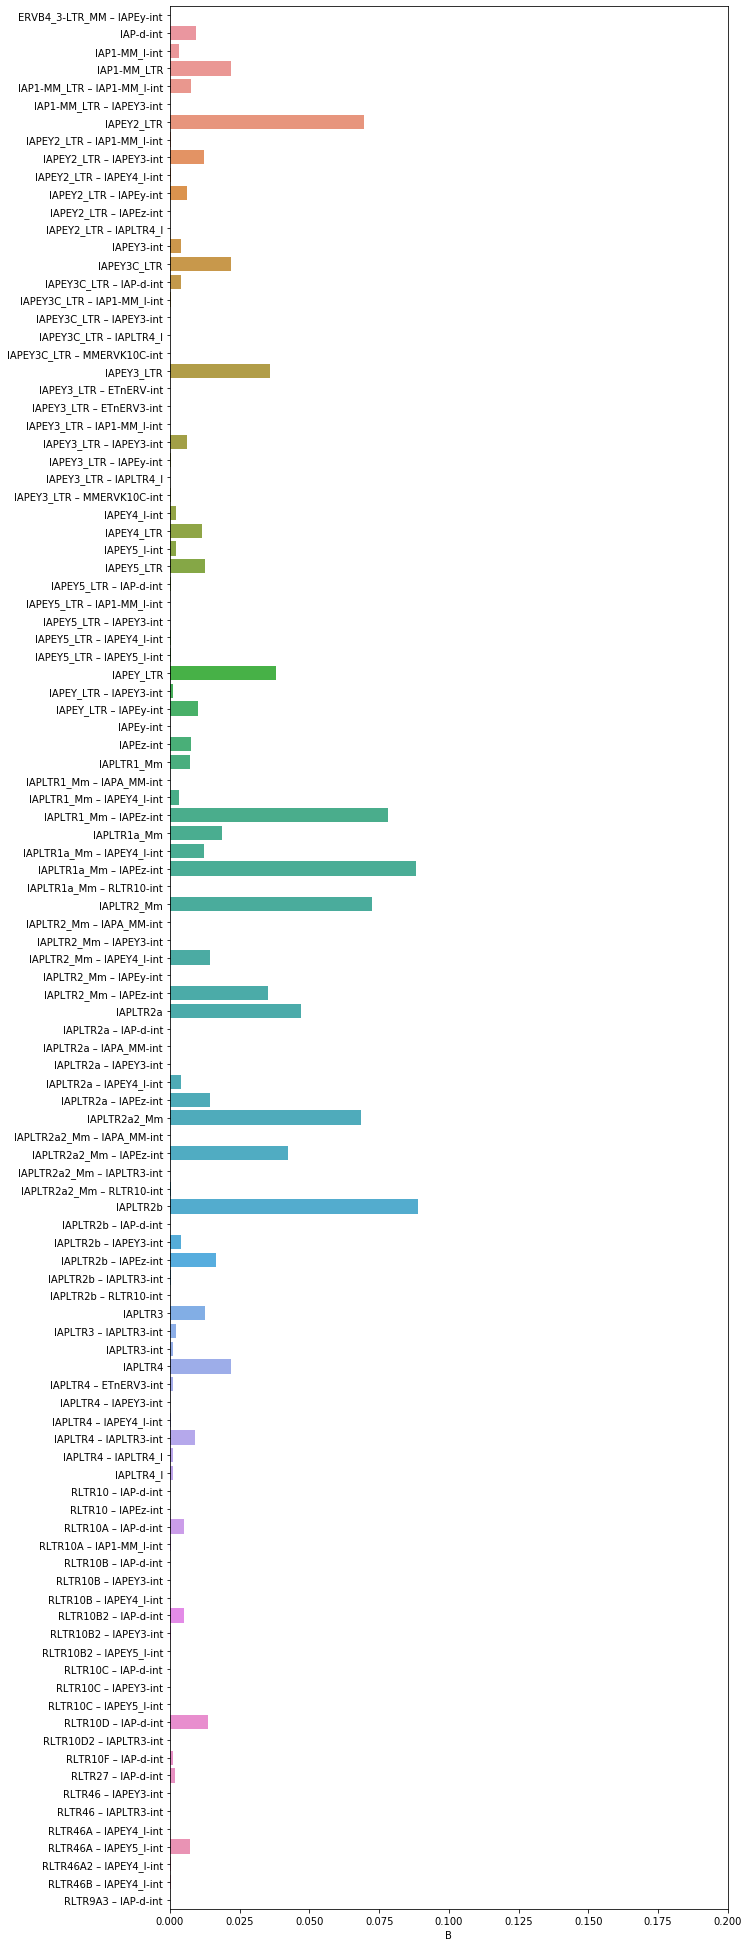

In [81]:
ax = sns.barplot(y=normalised_counts_dataframe.index, x=normalised_counts_dataframe["B"])
ax.set(xlim=(0, 0.2))

[(0, 0.2)]

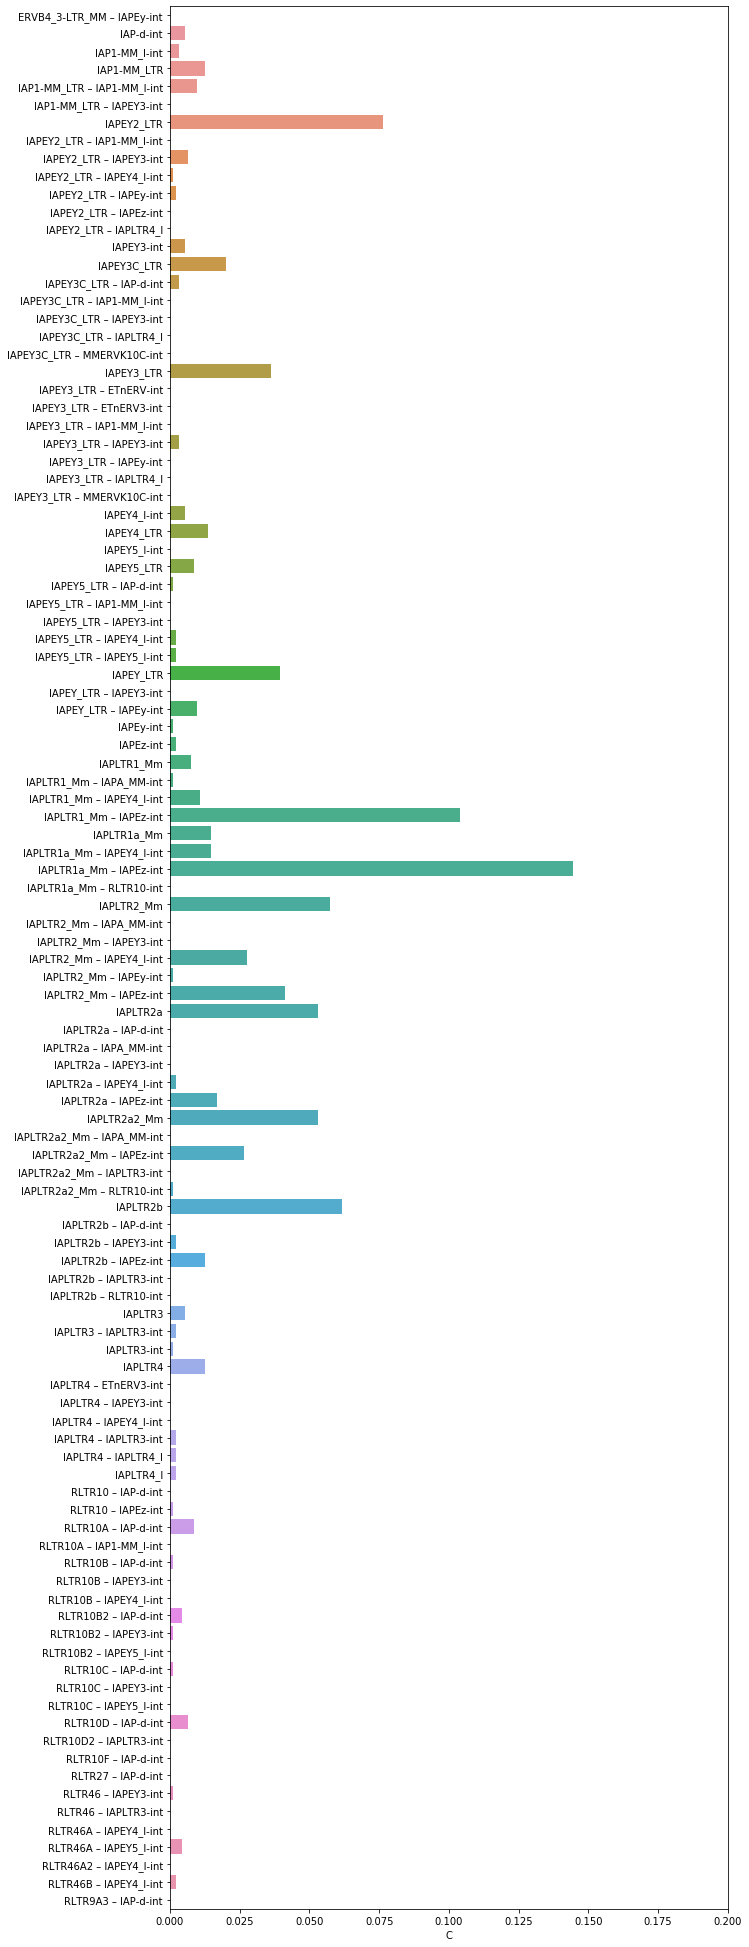

In [82]:
ax = sns.barplot(y=normalised_counts_dataframe.index, x=normalised_counts_dataframe["C"])
ax.set(xlim=(0, 0.2))

[(0, 0.2)]

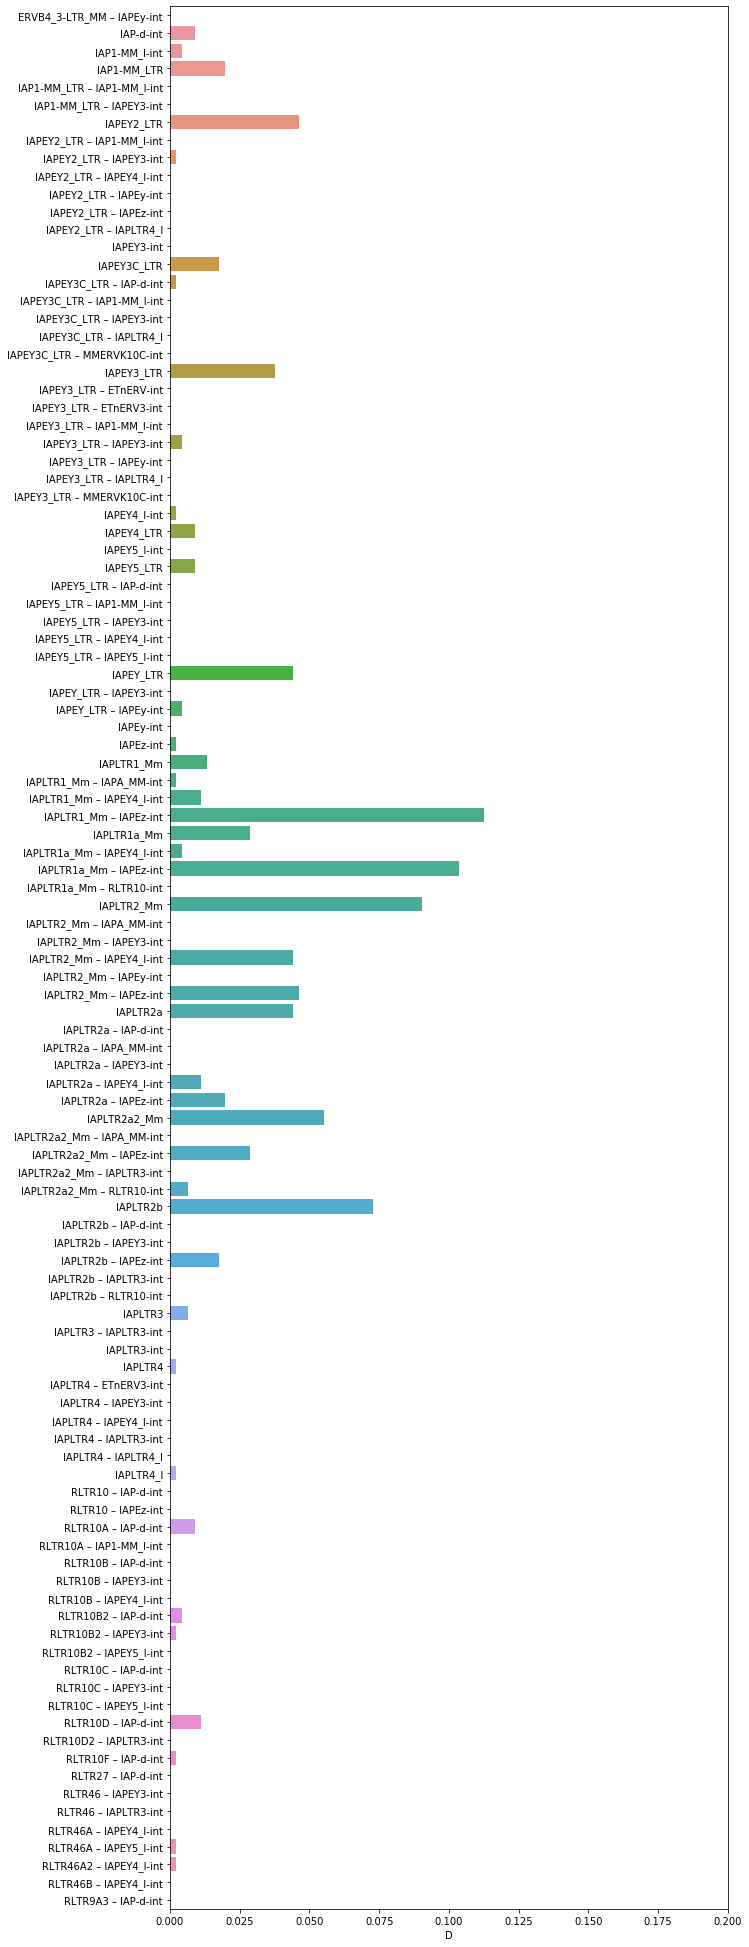

In [83]:
ax = sns.barplot(y=normalised_counts_dataframe.index, x=normalised_counts_dataframe["D"])
ax.set(xlim=(0, 0.2))

[(0, 0.2)]

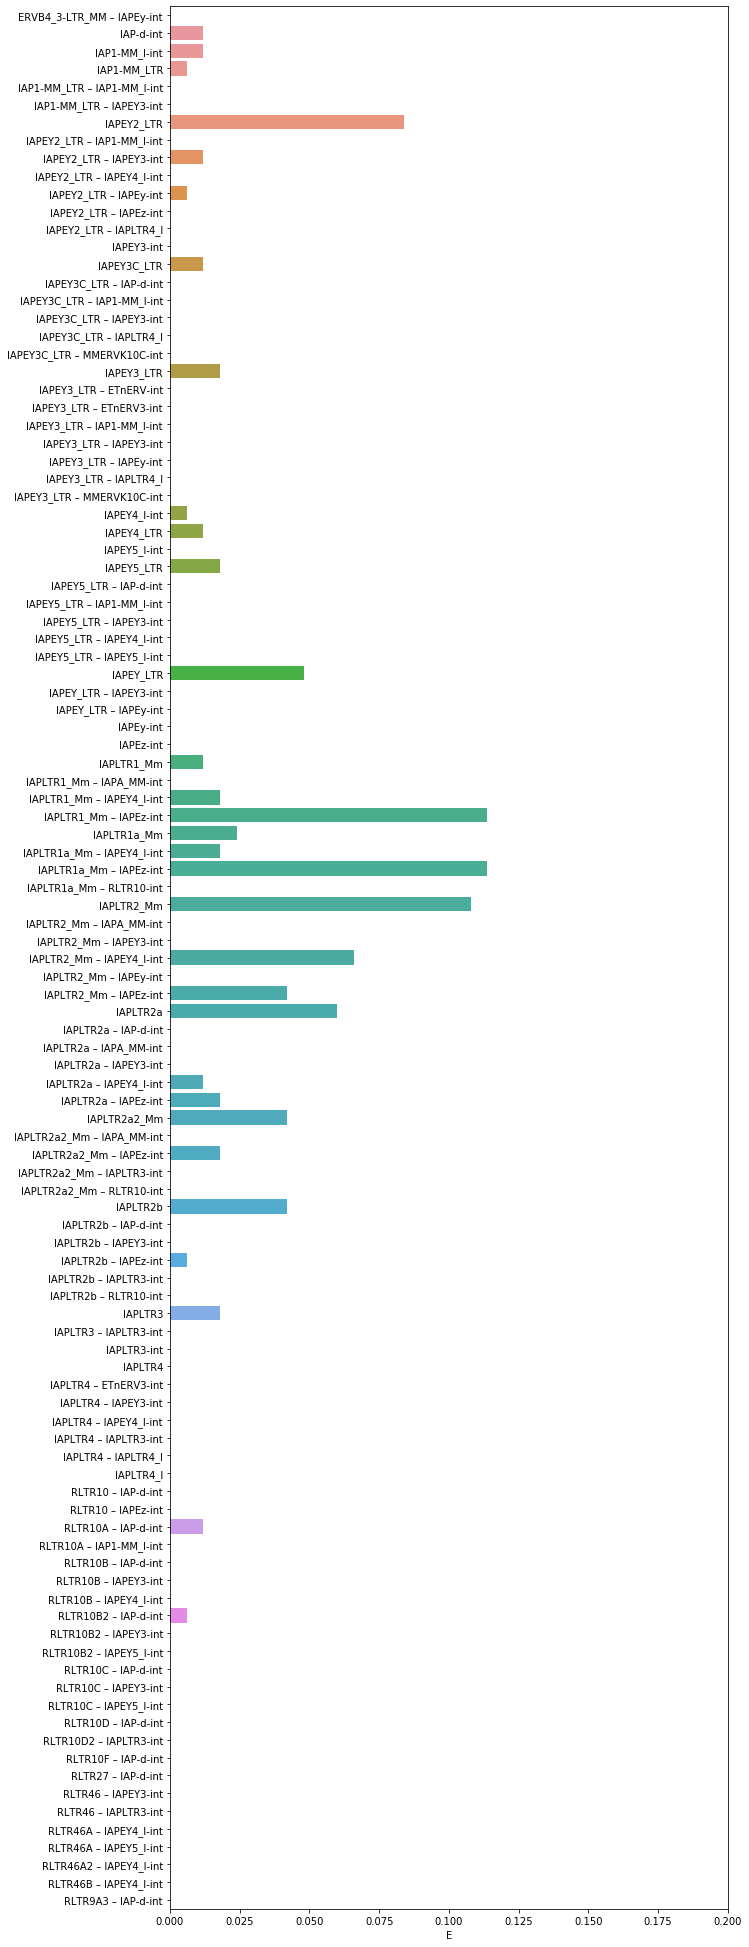

In [84]:
ax = sns.barplot(y=normalised_counts_dataframe.index, x=normalised_counts_dataframe["E"])
ax.set(xlim=(0, 0.2))